In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc3 import *
from numpy.random import uniform, normal

bp_u = 30 #switch point
c_u = [1, -1] #intercepts before and after switch point
beta_u = [0, -0.02]  #slopes before & after switch point

x = uniform(0,90, 200)

y = (x < bp_u)*(c_u[0]+beta_u[0]*x) + (x >= bp_u)*(c_u[1]+beta_u[1]*x) + normal(0,0.1,200)

with Model() as sw_model:

    sigma = 0.01

    switchpoint = Uniform('switchpoint', lower=x.min(), upper=x.max(), testval=45)

    # Priors for pre- and post-switch intercepts and slopes
    intercept_u1 = Uniform('Intercept_u1', lower=-10, upper=10)
    intercept_u2 = Uniform('Intercept_u2', lower=-10, upper=10)
    x_coeff_u1 = Normal('x_u1', 0, sd=20)
    x_coeff_u2 = Normal('x_u2', 0, sd=20)

    intercept = switch(switchpoint < x, intercept_u1, intercept_u2)
    x_coeff = switch(switchpoint < x, x_coeff_u1, x_coeff_u2)

    likelihood = Normal('y', mu=intercept + x_coeff * x, sd=sigma, observed=y)

    start = find_MAP() 

with sw_model:
    step1 = NUTS([intercept_u1, intercept_u2, x_coeff_u1, x_coeff_u2])
    step2 = NUTS([switchpoint])

    trace = sample(2000, step=[step1, step2], start=start, progressbar=True)

Applied interval-transform to switchpoint and added transformed switchpoint_interval to model.
Applied interval-transform to Intercept_u1 and added transformed Intercept_u1_interval to model.
Applied interval-transform to Intercept_u2 and added transformed Intercept_u2_interval to model.
 [-----------------100%-----------------] 2000 of 2000 complete in 28.4 sec

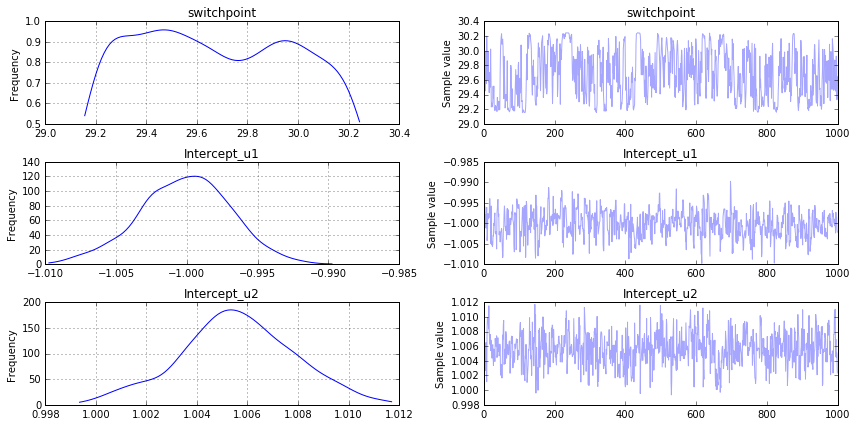

In [17]:
pm.traceplot(trace[-1000:], ['switchpoint', 'Intercept_u1', 'Intercept_u2']);

In [16]:
trace.varnames

['switchpoint_interval',
 'Intercept_u1_interval',
 'Intercept_u2_interval',
 'x_u1',
 'x_u2',
 'switchpoint',
 'Intercept_u1',
 'Intercept_u2']

In [1]:
import pymc3 as pm
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster")

In [2]:
disaster_data = np.ma.masked_values(np.array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, -999, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=np.int64), value=-999,)
year = np.arange(1851, 1962)

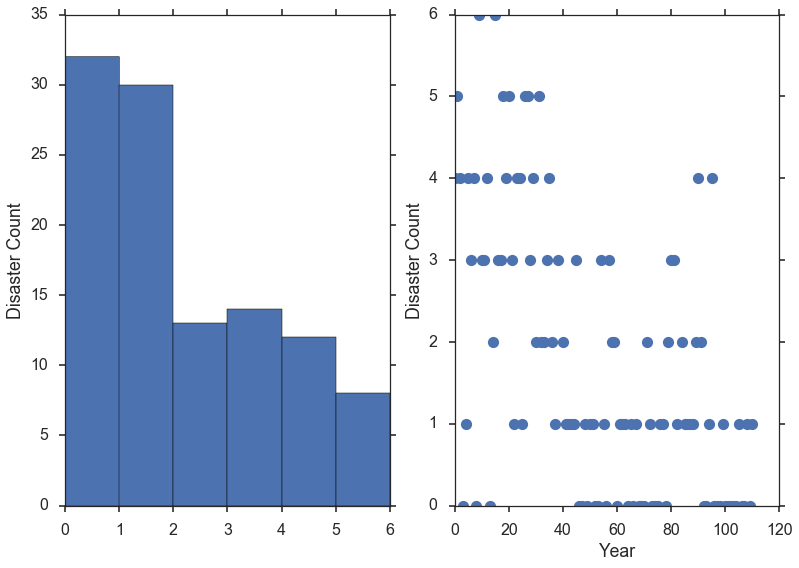

In [3]:
fig, ax = plt.subplots(1,2)

ax[0].hist(disaster_data, bins=range(disaster_data.max() + 1))
ax[1].plot(disaster_data, "o")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Disaster Count")
ax[0].set_ylabel("Disaster Count")
plt.show()

In [4]:
with pm.Model() as disaster_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=year.min(), upper=year.max(), testval=1900, dtype="int64")

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1, dtype="float64")
    late_rate = pm.Exponential('late_rate', 1, dtype="float64")

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.switch(switchpoint >= year, early_rate, late_rate)
    

    disasters = pm.Poisson('disasters', rate, observed=disaster_data, dtype="int64")

C:\Users\Walter\AppData\Local\Temp\cc9b1b5g.o: In function `instantiate':
C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:546: undefined reference to `__imp_PyExc_TypeError'
C:\Users\Walter\AppData\Local\Temp\cc9b1b5g.o: In function `run':
C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:98: undefined reference to `__imp__Py_NoneStruct'
C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:123: undefined reference to `__imp_PyExc_ValueError'
C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:129: undefined reference to `__imp_PyExc_RuntimeError'
C:/Users/Walter/AppData/Local/Theano/compiledir_Window

00001	#include <Python.h>
00002	#include <iostream>
00003	#include "theano_mod_helper.h"
00004	#include <math.h>
00005	#include <numpy/arrayobject.h>
00006	#include <numpy/arrayscalars.h>
00007	#include <vector>
00008	#include <algorithm>
00009	//////////////////////
00010	////  Support Code
00011	//////////////////////
00012	
00013	
00014	    namespace {
00015	    struct __struct_compiled_op_f613f4a9ab878b3ff77f289246cbeb89 {
00016	        PyObject* __ERROR;
00017	
00018	        PyObject* storage_V3;
00019	PyObject* storage_V5;
00020	PyObject* storage_V1;
00021	        
00022	
00023	        __struct_compiled_op_f613f4a9ab878b3ff77f289246cbeb89() {
00024	            // This is only somewhat safe because we:
00025	            //  1) Are not a virtual class
00026	            //  2) Do not use any virtual classes in the members
00027	            //  3) Deal with mostly POD and pointers
00028	
00029	            // If this changes, we would have to revise this, but for
00030	            // 

Exception: ("Compilation failed (return status=1): C:\\Users\\Walter\\AppData\\Local\\Temp\\cc9b1b5g.o: In function `instantiate':\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:546: undefined reference to `__imp_PyExc_TypeError'\r. C:\\Users\\Walter\\AppData\\Local\\Temp\\cc9b1b5g.o: In function `run':\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:98: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:123: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:129: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:157: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:194: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:209: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:476: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:447: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:482: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:243: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:264: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:172: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:178: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:513: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:512: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:511: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:278: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:293: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:258: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:327: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:348: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:215: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:342: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:394: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/Walter/AppData/Local/Theano/compiledir_Windows-7-6.1.7601-SP1-Intel64_Family_6_Model_62_Stepping_4_GenuineIntel-2.7.11-64/tmprduffy/mod.cpp:299: undefined reference to `__imp_PyExc_RuntimeError'\r. C:\\Users\\Walter\\AppData\\Local\\Temp\\cc9b1b5g.o: In function `_import_array':\r. C:/Anaconda/envs/theano_test/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1659: undefined reference to `__imp_PyCObject_Type'\r. C:/Anaconda/envs/theano_test/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1660: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Anaconda/envs/theano_test/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1661: undefined reference to `__imp_PyExc_ImportError'\r. C:/Anaconda/envs/theano_test/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1682: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Anaconda/envs/theano_test/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1682: undefined reference to `__imp_PyExc_ImportError'\r. C:/Anaconda/envs/theano_test/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1641: undefined reference to `__imp_PyExc_ImportError'\r. C:/Anaconda/envs/theano_test/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1704: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Anaconda/envs/theano_test/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1704: undefined reference to `__imp_PyExc_ImportError'\r. C:/Anaconda/envs/theano_test/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1647: undefined reference to `__imp_PyExc_AttributeError'\r. C:/Anaconda/envs/theano_test/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1668: undefined reference to `__imp_PyExc_ImportError'\r. C:/Anaconda/envs/theano_test/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1668: undefined reference to `__imp_PyExc_RuntimeError'\r. collect2.exe: error: ld returned 1 exit status\r. ", '[Elemwise{mul,no_inplace}(TensorConstant{1.0}, <TensorType(float32, scalar)>)]')

In [5]:
with disaster_model:
    step1 = pm.NUTS([early_rate, late_rate])

    # Use Metropolis for switchpoint, and missing values since it accommodates discrete variables
    step2 = pm.Metropolis([switchpoint, disasters.missing_values[0]] )

    trace = pm.sample(10000, step=[step1, step2])

NameError: name 'early_rate' is not defined